`교안tf2-00개발환경과TF준비설치.pdf` 

1. Tensorflow 설치
2. Tensorflow GPU 설치

# 1. Tensorflow 설치

텐서플로우는 대규모 수치 계산 라이브러리로 텐서는 다차원 행렬 계산을 의미한다. 딥러닝의 특징데로 계산식을 만들고 데이터를 넣어 실행하는 구조를 가지고 있다.

다차원 행렬 계산 라이브러리로서 영상처리 라이브러리도 제공하고, OpenCV 라이브러리와 함게 사용된다.


### TensorFlow 설치하기

> https://www.tensorflow.org/install/pip.html

64-bit systems 을 권장한다.

- Python 3.6~3.9
    - Python 3.9 지원에는 TensorFlow 2.5 이상이 필요합니다.
    - Python 3.8 지원에는 TensorFlow 2.2 이상이 필요합니다.
    - pip 19.0 이상(manylinux2010 지원 필요)
- Ubuntu 16.04 or later (64bit)
- Windows 7 or later
- macOS 10.12.6 (Sierra) or later (no GPU support)
     - macOS에는 pip 20.3 이상이 필요합니다.
- Raspbian 9.0 or later
- GPU 지원에는 CUDA® 지원 카드 필요(Ubuntu 및 Windows)

### pip 에서 설치

```sh
pip install --upgrade pip

pip install tensorflow

pip install keras --upgrade
```




### conda 로  설치

Anaconda 설치가 완료되면 conda 명령으로 TensorFlow를 설치한다.

가상환경에 텐서플로우 설치

```sh
conda install -c conda-forge tensorflow
conda install -c conda-forge keras
```

가상환경과 함게 설치

```sh
conda create -n tf2 tensorflow keras
conda activate tf2
```


#### macOS 

> macOS 경우 conda 환경에서 python3.9 의 tensorflow 가 지원 안되고 있다. (2021/09)

### 텐서플로우 확인

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

print(tf.__version__, np.__version__)

2.7.0 1.21.4


# 2. Tensorflow GPU 설치

https://www.tensorflow.org/install/gpu

1. NVIDIA 소프트웨어 호환 버전 확인
- https://www.tensorflow.org/install/source_windows#tested_build_configurations

2. CUDA Toolkit 과 그래픽 드라이버

CUDA toolkit Release note: https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html 의 Table 3에 있는 CUDA Toolkit과 드라이버 버전을 확인해야 한다.


설치한 tensorflow 에 따라 다운로드 한다.


#### NVIDIA Graphics driver

2 종류 드라이버 제공.

1. 게임 환경에 특화된 게임 레디(Game Ready) 드라이버(GRD)
1. 영상 편집 및 그래픽 작업 효율을 끌어올린 스튜디오(Studio) 드라이버(SD)

> 이슈: SD드라이버 설치하지 말자 - https://m.blog.naver.com/heraeka/221984564153

다음 방법으로 설치.

- Geforce Experience 에서 업데이트
- https://www.nvidia.com/en-us/geforce/drivers/



#### pip 를 통해 설치. (리눅스)

```
(tf25gpu_p39)qkboo@desktop-goyangi:~$ pip install tensorflow==2.6 tensorflow-gpu
Collecting tensorflow==2.6
  Downloading tensorflow-2.6.0-cp39-cp39-manylinux2010_x86_64.whl (458.4 MB)
     |████████████████████████████████| 458.4 MB 9.4 MB/s
Collecting tensorflow-gpu
  Downloading tensorflow_gpu-2.7.0-cp39-cp39-manylinux2010_x86_64.whl (489.7 MB)
     |███████████████████▎            | 294.6 MB 43.5 MB/s eta 0:00:05
```

### GPU

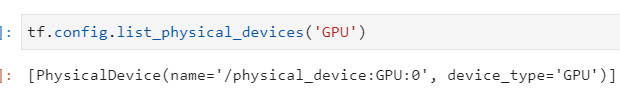

https://www.tensorflow.org/guide/gpu?hl=ko

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### cuDNN 설치 안된 경우

![](https://i.imgur.com/SVMw78z.png)

### Windows 10 / Tensorflow:RNN 패키지 NumPy 의존성 문제.

Anaconda/Miniconda 기반의 바이너리 배포본의 경우
 - Tensorflow 2.5/2.6 -> NumPy 1.21 의존성
 - Tensorflow/RNN 패키지에 NumPy 1.18, 1.19 의 함수 로 다음 에러
 
![](https://i.imgur.com/TQ546Eg.png)

 - Colab도 Tensorflow 2.7 + NumPy 1.19.5 사용


### 해결1: 소스 수정

윈도우: conda로 NumPy 1.19 기반으로 Tensorflow 2.5 이상 설치는 쉽지 않다
- 소스 수정: https://github.com/tensorflow/models/issues/9706

에러난 np.prod() 를 tensorflow 함수로 대체하거나 최신 numpy 함수로 대체하면 된다.

![](https://i.imgur.com/EHWJ5DD.png)

```Python
# import 
from tensorflow.python.ops.math_ops import reduce_prod

# 2896 라인: 
if reduce_prod(shape) < 1000:
```

### 해결2: 최신 Tensorflow > 2.5 과 NumPy 설치 가능하면,

```
conda install numpy=1.19.5 -c conda-forge
```

혹은 새 가상환경

```
> conda create -n Lec11_AI2 tensorflow numpy=1.19
```

### RNN 테스트 코드
 - tensorflow 2.9.1,      numpy 1.22.4
 - tensorflow 2.6, 2.6, numpy 1.19

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np

print(tf.__version__, np.__version__)


2.9.1 1.22.4


다음 RNN 코드가 정상 수행시 성공!

In [2]:
# tensorflow 2.9.1,      numpy 1.22.4
# tensorflow 2.6, 2.6,  numpy 1.19
# 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

2022-07-19 14:16:47.436811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-19 14:16:47.517315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-19 14:16:47.517833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-19 14:16:47.519294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


# 메모리 확장

In [1]:
#1: 
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

NameError: name 'tf' is not defined